## MIS780 Advanced AI For Business - Assignment 1 - T2 2022

**Student Name:** Pranitha Gaddam

**Student ID:** 221183244

## Table of Content
   
1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary
 

**Aim**: **The aim of this project is to provide insights on the modern customer support practices and different topics of discussion in these conversations and the overall sentiment from the customers about each company via conducting Sentiment Analysis based on the tweets generated by the customer support agents and customers on Twitter.Additionally, we will derive the most frequent Topics in the tweets based on Topic Analysis and Modelling.**

The Customer Support on Twitter dataset is a large, modern corpus including tweets and replies to help innovation in natural language understanding and conversational models. 

The first three questions addresses the data exploratory questions which involves calculating the Top 10 brands according to the maximum number of tweets posted (including customers and companies).This is solved by combining the customer + company tweets extracted from the dataset.We come to know that the Top 10 companies are AmazonHelp (12471), AppleSupport(5781) , Uber_Support(3801) ,Tesco(2749), British_Airways(2441), SpotifyCares(2326), VirginTrains(2232), sainsburys(2203), AmericanAir(1135) and GWRHelp(1039).


This is followed by calculating the number of tweets by the weekdays (convert the 'created_at' column using str.split function. Thursday, Wednesday and Friday are the days where highest engagement is seen on Twitter.This could be because these days are halfway to the weekend. 

The number of customers that specifically requested for support from AmazonHelp is also calculated by extracting it from the 'customer' text. There are 5547 customers who requested support. 

The fourth question revolves around Sentiment Analysis for the top 5 brands and computing the proportion of positive vs. negative tweets between the brands using Lexicon-based sentiment analysis. Firstly, we clean the text by defining a function and then creating a seperate dataframe including only the top 5 brands. Following, we import relevant modules from NLTK library : VADER (pre-trained on social media data to give an overall sentiment score -1 to +1. AmazonHelp has the highest count of Positive Sentiment (440), followed by AppleSupport(220) with a negative sentiment of 89 counts. We further plot proportion of reviews with respect to the positive sentiments. We can se that SpotifyCares has the highest proportion of positive reviews, followed by Tesco and Uber_Support. However, AmazonHelp and AppleSupport have the same proportion. 

Lastly, we determine the number of topics frequently mentioned by customers of AppleSupport via text-processing and LDA modelling (Latent Dirichlet Allocation).This is carried by doing some text preprocessing. After, data cleaning , I have applied Term Frequency representation of the document for LDA modelling. Furthermore, I have trained an LDA with 10 topics and used Word Probabilities by Topic. The top 10 topics generated by LDA have been visualised using the word clouds.

The benefits associated with this business problem will in turn help the companies better address the problems that its customer's are facing and would likely help improve their customer service in future. It would also aid in healthy competition between the brands and propel them to compete based on the positive and negative sentiments of each company. 

<a id = "cell_exploration"></a>
### 2. Data Exploration

<a id = "Q1"></a>
###  Q1

In [4]:
import pandas as pd

Tw_df = pd.read_csv('Twitter.csv')
Tw_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [5]:
Tw_df.isnull().sum()

tweet_id                       0
author_id                      0
inbound                        0
created_at                     0
text                           0
response_tweet_id          32429
in_response_to_tweet_id    25910
dtype: int64

In [6]:
Tw_df['tweet_id'].count()

100000

In [7]:
x = Tw_df.groupby(by="author_id").count()
x

,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
author_id,,,,,,
11113,2,2,2,2,2,2
115712,10,10,10,10,8,7
115713,3,3,3,3,3,2
115714,25,25,25,25,25,7
115715,1,1,1,1,1,0
...,...,...,...,...,...,...
mediatemplehelp,13,13,13,13,6,13
nationalrailenq,201,201,201,201,118,180
sainsburys,1081,1081,1081,1081,569,1077


In [8]:
y = x.sort_values(by=['tweet_id'], ascending=False)
q = y.head(10).reset_index()
q

,author_id,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,AmazonHelp,6924,6924,6924,6924,4099,6906
1,AppleSupport,3106,3106,3106,3106,1190,3093
2,Uber_Support,2102,2102,2102,2102,811,2101
3,Tesco,1450,1450,1450,1450,586,1446
4,SpotifyCares,1356,1356,1356,1356,549,1350
5,British_Airways,1156,1156,1156,1156,578,1147
6,comcastcares,1092,1092,1092,1092,285,1091
7,sainsburys,1081,1081,1081,1081,569,1077
8,Delta,1039,1039,1039,1039,350,1035
9,VirginTrains,1001,1001,1001,1001,612,988


In [9]:
v = Tw_df[['text']]
v

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.
...,...
99995,@144297 We understand you have received a diff...
99996,@AmazonHelp I have already raised d issue ther...
99997,@144297 If you've shared your details via the ...
99998,@AmazonHelp It was a great help from ur side w...


In [10]:
#Visualizing our data
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Tweet Count')

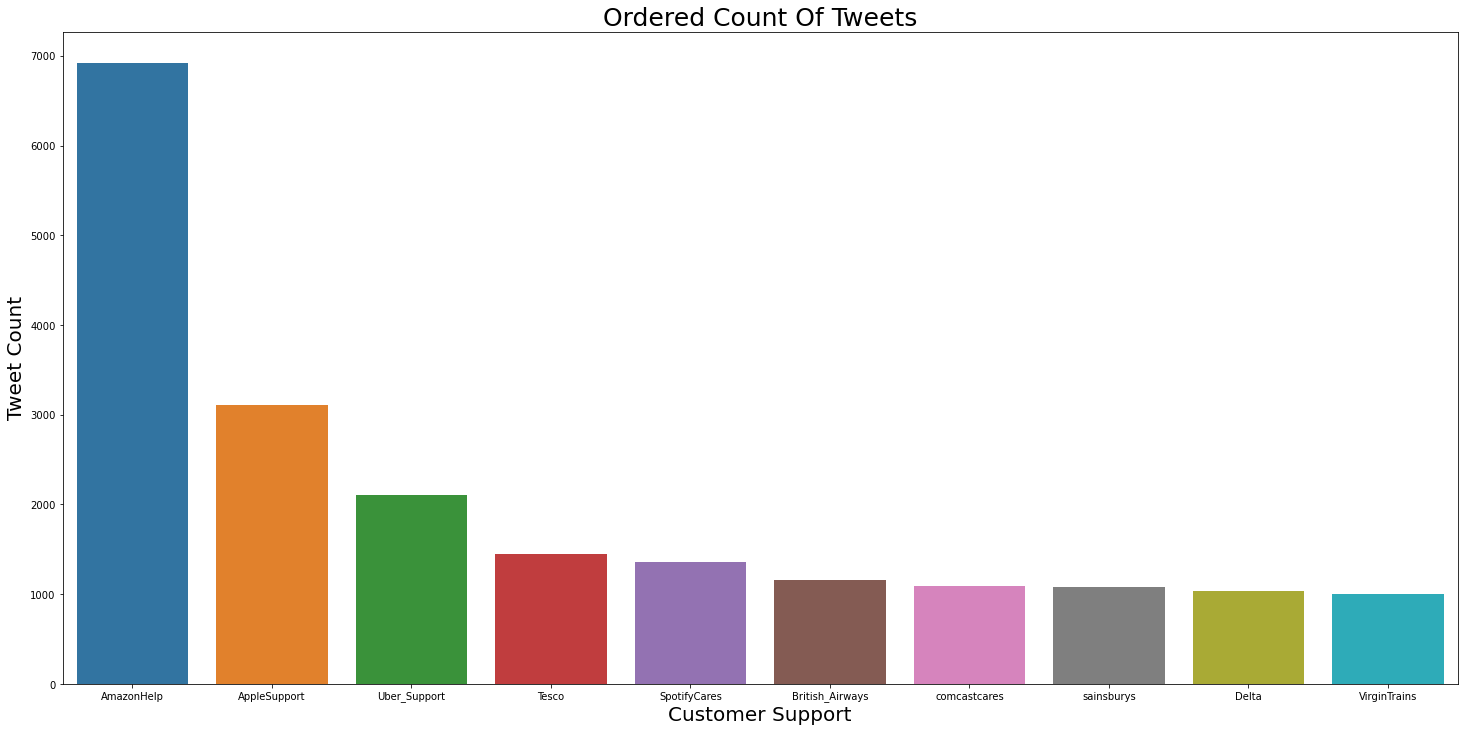

In [15]:
#Calculate 10 highest tweet count
tweets = df['tweet_id'].groupby(df['author_id']).count().to_frame().reset_index()
Count = tweets.nlargest(10, 'tweet_id')

plt.figure(figsize=(25, 12))
sns.barplot(x = Count['author_id'], y = Count['tweet_id'])
plt.title('Ordered Count Of Tweets', fontsize = 25)
plt.xlabel('Customer Support', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)

In [16]:
u = Count.reset_index()
u

,index,author_id,tweet_id
0,27495,AmazonHelp,6924
1,27497,AppleSupport,3106
2,27569,Uber_Support,2102
3,27564,Tesco,1450
4,27561,SpotifyCares,1356
5,27520,British_Airways,1156
6,27583,comcastcares,1092
7,27589,sainsburys,1081
8,27526,Delta,1039
9,27574,VirginTrains,1001


Text(0, 0.5, 'Tweet Count')

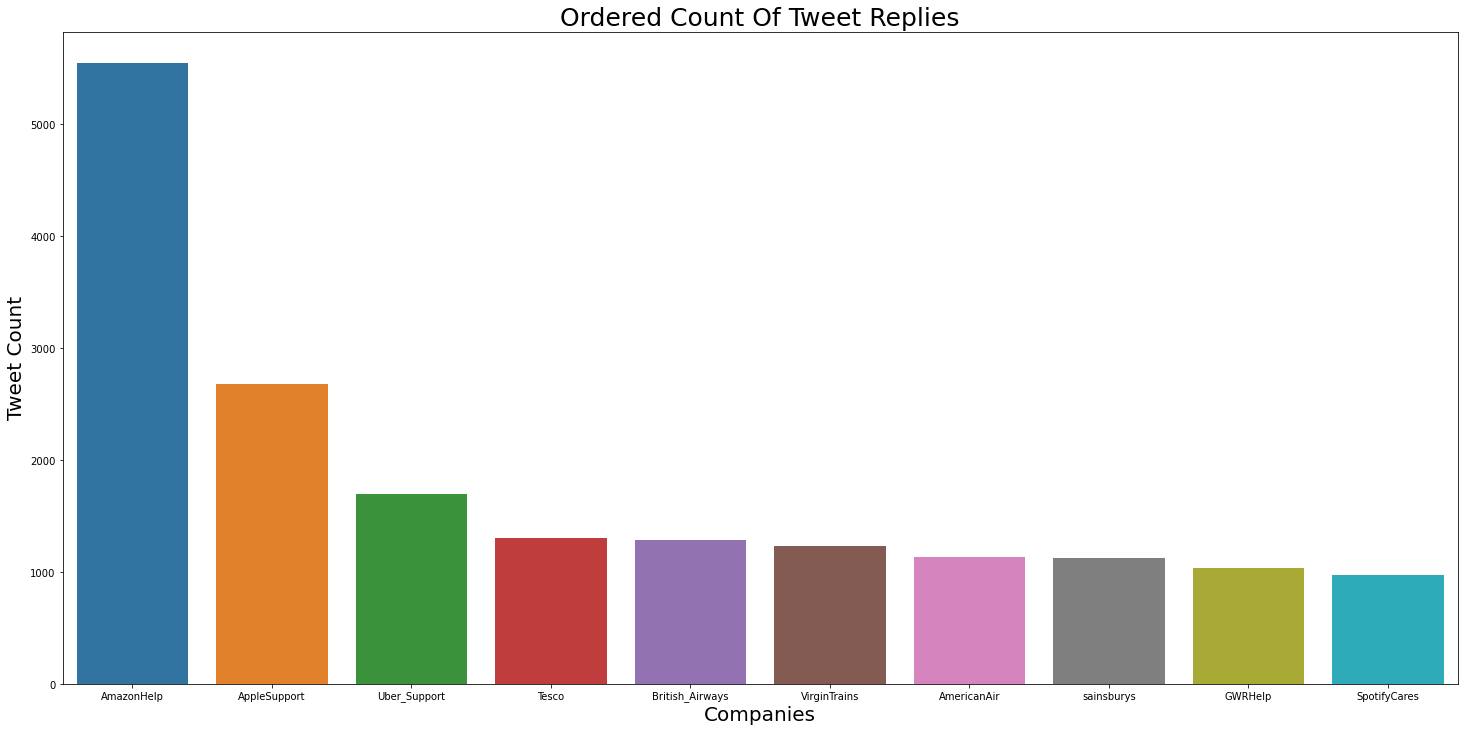

In [17]:
#Extract the customer support company
Tw_df['customer'] = Tw_df['text'].str.extract(r'@(\w+)')

#Calculate 10 highest tweet count
Cus_tweets = Tw_df['tweet_id'].groupby(Tw_df['customer']).count().to_frame().reset_index()
Cus_count = Cus_tweets.nlargest(10, 'tweet_id')

plt.figure(figsize=(25, 12))
sns.barplot(x = Cus_count['customer'], y = Cus_count['tweet_id'])
plt.title('Ordered Count Of Tweet Replies', fontsize = 25)
plt.xlabel('Companies', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)

In [18]:
o = Cus_count.reset_index()
o

,index,customer,tweet_id
0,27681,AmazonHelp,5547
1,27685,AppleSupport,2675
2,27779,Uber_Support,1699
3,27773,Tesco,1299
4,27711,British_Airways,1285
5,27785,VirginTrains,1231
6,27683,AmericanAir,1135
7,27850,sainsburys,1122
8,27726,GWRHelp,1039
9,27767,SpotifyCares,970


In [19]:
import pandas as pd

data={'Company':['AmazonHelp','AppleSupport','Uber_Support','Tesco','British_Airways','SpotifyCares','VirginTrains','sainsburys','AmericanAir','GWRHelp']
      ,'Total_tweets':[12471,5781,3801,2749,2441,2326,2232,2203,1135,1039]}

Top_10=pd.DataFrame(data)

Top_10

,Company,Total_tweets
0,AmazonHelp,12471
1,AppleSupport,5781
2,Uber_Support,3801
3,Tesco,2749
4,British_Airways,2441
5,SpotifyCares,2326
6,VirginTrains,2232
7,sainsburys,2203
8,AmericanAir,1135
9,GWRHelp,1039


<a id = "Q2"></a>
###  Q2

In [21]:
Tw_df.dtypes

tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
customer                    object
dtype: object

In [22]:
Tw_df[['weekday','month','day','time','+0000','year']] = Tw_df['created_at'].str.split(" ", expand = True) 

In [23]:
Amazon = Tw_df.loc[(Tw_df['author_id'] == 'AmazonHelp')|(Tw_df['customer'] == 'AmazonHelp')]
Amazon

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
181,269,AmazonHelp,False,Wed Nov 22 09:23:01 +0000 2017,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0,115770,Wed,Nov,22,09:23:01,+0000,2017
182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017
183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017
184,273,AmazonHelp,False,Wed Nov 22 09:40:27 +0000 2017,@115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...,274,271.0,115770,Wed,Nov,22,09:40:27,+0000,2017
185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,126120,AmazonHelp,False,Fri Nov 24 02:50:29 +0000 2017,@144297 We understand you have received a diff...,126121,126122.0,144297,Fri,Nov,24,02:50:29,+0000,2017
99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017
99997,126123,AmazonHelp,False,Fri Nov 24 10:38:31 +0000 2017,@144297 If you've shared your details via the ...,NaN,126121.0,144297,Fri,Nov,24,10:38:31,+0000,2017
99998,126122,144297,True,Fri Nov 24 02:15:13 +0000 2017,@AmazonHelp It was a great help from ur side w...,126120,126124.0,AmazonHelp,Fri,Nov,24,02:15:13,+0000,2017


In [24]:
Amazon.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,1107,1107,1107,1107,1107,730,1092,1107,1107,1107,1107,1107,1107
Mon,188,188,188,188,188,167,180,188,188,188,188,188,188
Sat,340,340,340,340,340,260,329,340,340,340,340,340,340
Sun,386,386,386,386,386,282,375,386,386,386,386,386,386
Thu,5674,5674,5674,5674,5674,3839,5364,5674,5674,5674,5674,5674,5674
Tue,544,544,544,544,544,456,509,544,544,544,544,544,544
Wed,4232,4232,4232,4232,4232,2671,3968,4232,4232,4232,4232,4232,4232


In [25]:
import matplotlib.pyplot as plt

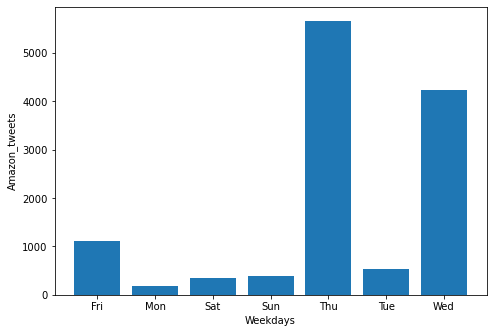

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Amazon_tweets = [1107,188,340,386,5674,544,4232]
ax.bar(Weekdays,Amazon_tweets)
ax.set_ylabel('Amazon_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [27]:
Apple = Tw_df.loc[(Tw_df['author_id'] == 'AppleSupport')|(Tw_df['customer'] == 'AppleSupport')]
Apple

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0,115854,Tue,Oct,31,22:27:49,+0000,2017
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0,115854,Tue,Oct,31,22:36:27,+0000,2017
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99696,125804,AppleSupport,False,Fri Nov 24 02:32:26 +0000 2017,@144230 If you're having issues with your iPho...,NaN,125805.0,144230,Fri,Nov,24,02:32:26,+0000,2017
99698,125806,AppleSupport,False,Fri Nov 24 02:31:00 +0000 2017,@143286 Great! We're glad to see you were able...,"125,807,125,808",125809.0,143286,Fri,Nov,24,02:31:00,+0000,2017
99699,125807,143286,True,Fri Nov 24 02:34:10 +0000 2017,@AppleSupport And I can’t!,NaN,125806.0,AppleSupport,Fri,Nov,24,02:34:10,+0000,2017
99700,125808,143286,True,Fri Nov 24 02:33:57 +0000 2017,"@AppleSupport Well, it’s still an issue as I s...",NaN,125806.0,AppleSupport,Fri,Nov,24,02:33:57,+0000,2017


In [28]:
Apple.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,335,335,335,335,335,194,288,334,335,335,335,335,335
Mon,43,43,43,43,43,33,31,42,43,43,43,43,43
Sat,55,55,55,55,55,40,47,54,55,55,55,55,55
Sun,146,146,146,146,146,95,121,145,146,146,146,146,146
Thu,2216,2216,2216,2216,2216,1340,1715,2214,2216,2216,2216,2216,2216
Tue,347,347,347,347,347,267,267,344,347,347,347,347,347
Wed,2639,2639,2639,2639,2639,1582,2074,2639,2639,2639,2639,2639,2639


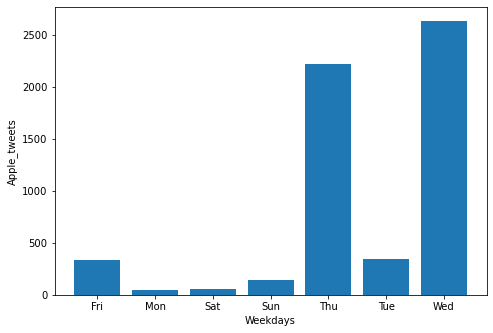

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Apple_tweets = [335,43,55,146,2216,347,2639]
ax.bar(Weekdays,Apple_tweets)
ax.set_ylabel('Apple_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [30]:
Uber = Tw_df.loc[(Tw_df['author_id'] == 'Uber_Support')|(Tw_df['customer'] == 'Uber_Support')]
Uber

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
463,768,Uber_Support,False,Tue Oct 31 22:28:17 +0000 2017,@115872 Happy to follow up! Contact us via htt...,"769,770",771.0,115872,Tue,Oct,31,22:28:17,+0000,2017
464,769,115872,True,Tue Oct 31 22:30:07 +0000 2017,@Uber_Support Already did that was told we req...,NaN,768.0,Uber_Support,Tue,Oct,31,22:30:07,+0000,2017
465,770,Uber_Support,False,Tue Oct 31 22:31:08 +0000 2017,@115872 We apologize for the trouble! Send us ...,NaN,768.0,115872,Tue,Oct,31,22:31:08,+0000,2017
467,772,Uber_Support,False,Tue Oct 31 22:25:26 +0000 2017,@115874 We're here to help! Send us a note her...,NaN,773.0,115874,Tue,Oct,31,22:25:26,+0000,2017
469,774,Uber_Support,False,Tue Oct 31 22:19:18 +0000 2017,"@115875 We’re here to help, Travis! Send us a ...",NaN,775.0,115875,Tue,Oct,31,22:19:18,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99770,125880,Uber_Support,False,Fri Nov 24 02:33:29 +0000 2017,@144245 Happy to take a closer look! Send us a...,NaN,125881.0,144245,Fri,Nov,24,02:33:29,+0000,2017
99771,125881,144245,True,Fri Nov 24 02:32:48 +0000 2017,@Uber_Support - I have a problem with credits ...,125880,NaN,Uber_Support,Fri,Nov,24,02:32:48,+0000,2017
99772,125882,Uber_Support,False,Fri Nov 24 02:30:56 +0000 2017,@144246 We take this very seriously. Please se...,NaN,125883.0,144246,Fri,Nov,24,02:30:56,+0000,2017
99899,126022,Uber_Support,False,Sat Nov 18 22:38:26 +0000 2017,@144278 Happy to help! You can always share yo...,126023,126024.0,144278,Sat,Nov,18,22:38:26,+0000,2017


In [31]:
Uber.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,336,336,336,336,336,187,301,336,336,336,336,336,336
Mon,30,30,30,30,30,27,26,30,30,30,30,30,30
Sat,35,35,35,35,35,26,32,35,35,35,35,35,35
Sun,120,120,120,120,120,75,106,120,120,120,120,120,120
Thu,1619,1619,1619,1619,1619,907,1349,1617,1619,1619,1619,1619,1619
Tue,183,183,183,183,183,137,139,183,183,183,183,183,183
Wed,1478,1478,1478,1478,1478,810,1206,1478,1478,1478,1478,1478,1478


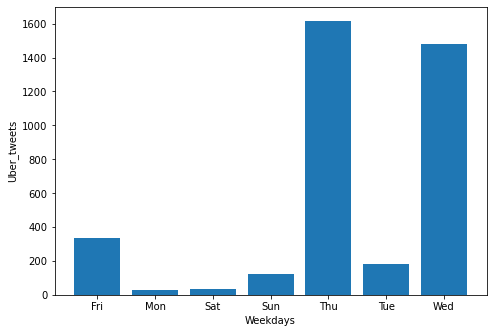

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Uber_tweets = [336,30,35,120,1619,183,1478]
ax.bar(Weekdays,Uber_tweets)
ax.set_ylabel('Uber_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [33]:
Tes = Tw_df.loc[(Tw_df['author_id'] == 'Tesco')|(Tw_df['customer'] == 'Tesco')]
Tes

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
480,785,Tesco,False,Tue Oct 31 22:18:58 +0000 2017,"@115881 Hi Cade, thanks so much for sending th...",NaN,786.0,115881,Tue,Oct,31,22:18:58,+0000,2017
481,786,115881,True,Tue Oct 31 20:29:25 +0000 2017,"@Tesco Tall lady 6ft, slim, was on the till ab...","785,787",788.0,Tesco,Tue,Oct,31,20:29:25,+0000,2017
482,788,Tesco,False,Tue Oct 31 19:47:00 +0000 2017,"@115881 Hi Cade, what was my colleagues name? ...",786,789.0,115881,Tue,Oct,31,19:47:00,+0000,2017
483,789,115881,True,Tue Oct 31 18:02:11 +0000 2017,@Tesco 3/3 on the wrong which I really don’t a...,788,NaN,Tesco,Tue,Oct,31,18:02:11,+0000,2017
1222,1813,Tesco,False,Tue Oct 31 22:41:35 +0000 2017,"@116114 Hi there, I've replied to your DM abou...",NaN,1814.0,116114,Tue,Oct,31,22:41:35,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99374,124880,143978,True,Fri Nov 24 02:02:25 +0000 2017,@Tesco I have sent my details on two separate ...,125416,124879.0,Tesco,Fri,Nov,24,02:02:25,+0000,2017
99375,125427,Tesco,False,Fri Nov 24 02:13:39 +0000 2017,"@144123 I'm sorry to advise Andrew, I am not a...",125428,125429.0,144123,Fri,Nov,24,02:13:39,+0000,2017
99376,125428,144123,True,Fri Nov 24 08:32:55 +0000 2017,"@Tesco Ah, no big deal, I know you used to sel...",125430,125427.0,Tesco,Fri,Nov,24,08:32:55,+0000,2017
99377,125430,Tesco,False,Fri Nov 24 08:50:24 +0000 2017,@144123 No problem Andrew. Thanks! - Brian,NaN,125428.0,144123,Fri,Nov,24,08:50:24,+0000,2017


In [34]:
Tes.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,167,167,167,167,167,88,152,167,167,167,167,167,167
Mon,58,58,58,58,58,46,43,57,58,58,58,58,58
Sat,37,37,37,37,37,31,29,37,37,37,37,37,37
Sun,54,54,54,54,54,30,50,53,54,54,54,54,54
Thu,1339,1339,1339,1339,1339,835,1031,1339,1339,1339,1339,1339,1339
Tue,226,226,226,226,226,194,155,225,226,226,226,226,226
Wed,868,868,868,868,868,494,702,868,868,868,868,868,868


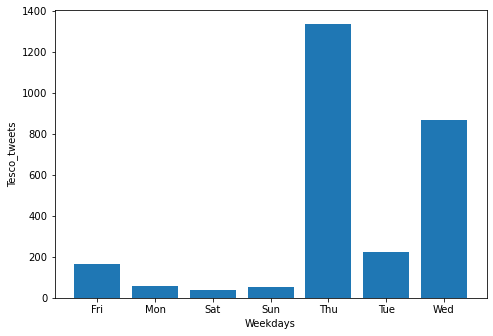

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Tesco_tweets = [167,58,37,54,1339,226,868]
ax.bar(Weekdays,Tesco_tweets)
ax.set_ylabel('Tesco_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [36]:
British = Tw_df.loc[(Tw_df['author_id'] == 'British_Airways')|(Tw_df['customer'] == 'British_Airways')]
British

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
558,867,British_Airways,False,Tue Oct 31 22:28:36 +0000 2017,@115892 caused. We're unable to offer a compli...,"868,869,870,871",872.0,115892,Tue,Oct,31,22:28:36,+0000,2017
559,868,115892,True,Tue Oct 31 22:34:33 +0000 2017,"@British_Airways Sure, how much would an upgra...",873,867.0,British_Airways,Tue,Oct,31,22:34:33,+0000,2017
560,873,British_Airways,False,Wed Nov 01 09:35:44 +0000 2017,@115892 Please can you DM us your booking refe...,NaN,868.0,115892,Wed,Nov,01,09:35:44,+0000,2017
561,869,115892,True,Wed Nov 01 08:44:59 +0000 2017,"@British_Airways Or, more importantly, are the...",NaN,867.0,British_Airways,Wed,Nov,01,08:44:59,+0000,2017
562,870,115892,True,Wed Nov 01 08:48:52 +0000 2017,@British_Airways This itinerary is preferred--...,NaN,867.0,British_Airways,Wed,Nov,01,08:48:52,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,125931,British_Airways,False,Wed Nov 22 20:35:22 +0000 2017,"@144261 We don't like to hear this, David. Wha...",125930,125932.0,144261,Wed,Nov,22,20:35:22,+0000,2017
99822,125932,144261,True,Wed Nov 22 16:57:56 +0000 2017,@British_Airways \nIf you want to travel with ...,125931,NaN,British_Airways,Wed,Nov,22,16:57:56,+0000,2017
99823,125933,British_Airways,False,Fri Nov 24 02:47:04 +0000 2017,@144262 I'm afraid we don't offer test flights...,NaN,125934.0,144262,Fri,Nov,24,02:47:04,+0000,2017
99824,125934,144262,True,Fri Nov 24 02:27:24 +0000 2017,@British_Airways How about a test flight,125933,125935.0,British_Airways,Fri,Nov,24,02:27:24,+0000,2017


In [37]:
British.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,193,193,193,193,193,96,177,192,193,193,193,193,193
Mon,48,48,48,48,48,40,39,47,48,48,48,48,48
Sat,44,44,44,44,44,40,29,44,44,44,44,44,44
Sun,63,63,63,63,63,43,59,63,63,63,63,63,63
Thu,1026,1026,1026,1026,1026,686,779,1025,1026,1026,1026,1026,1026
Tue,301,301,301,301,301,236,184,298,301,301,301,301,301
Wed,766,766,766,766,766,463,615,763,766,766,766,766,766


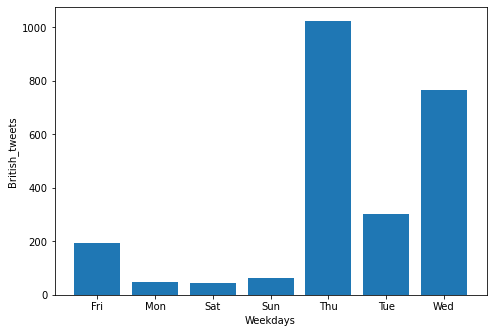

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
British_tweets = [193,48,44,63,1026,301,766]
ax.bar(Weekdays,British_tweets)
ax.set_ylabel('British_tweets')
ax.set_xlabel('Weekdays')
plt.show()

<a id = "Q3"></a>
###  Q3

In [40]:
Support = Tw_df.loc[(Tw_df['customer'] == 'AmazonHelp')]
Support.count()

tweet_id                   5547
author_id                  5547
inbound                    5547
created_at                 5547
text                       5547
response_tweet_id          4306
in_response_to_tweet_id    4911
customer                   5547
weekday                    5547
month                      5547
day                        5547
time                       5547
+0000                      5547
year                       5547
dtype: int64

Answer - 5547 customers requested for support from AmazonHelp in the dataset. 

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

**Aim:** To demonstrate understanding in sentiment analysis.
 

In [44]:
#Cleaning the text : 
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).(>).(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

Tw_df['text'] = preprocess(Tw_df['text']) 

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3753929876.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("(<br/>)", "")
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3753929876.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(<a).(>).(</a>)', '')
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3753929876.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&amp)', '')
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3753929876.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&gt)', '')
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3753929876.py:7: FutureWarning: The default value of regex wil

In [45]:
Tw_df

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712,Tue,Oct,31,22:10:47,+0000,2017
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare,Tue,Oct,31,22:11:45,+0000,2017
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare,Tue,Oct,31,22:08:27,+0000,2017
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712,Tue,Oct,31,21:54:49,+0000,2017
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare,Tue,Oct,31,21:49:35,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,126120,AmazonHelp,False,Fri Nov 24 02:50:29 +0000 2017,@144297 We understand you have received a diff...,126121,126122.0,144297,Fri,Nov,24,02:50:29,+0000,2017
99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017
99997,126123,AmazonHelp,False,Fri Nov 24 10:38:31 +0000 2017,@144297 If you've shared your details via the ...,NaN,126121.0,144297,Fri,Nov,24,10:38:31,+0000,2017
99998,126122,144297,True,Fri Nov 24 02:15:13 +0000 2017,@AmazonHelp It was a great help from ur side w...,126120,126124.0,AmazonHelp,Fri,Nov,24,02:15:13,+0000,2017


In [46]:
Sentiment = Tw_df.query("customer in ('AmazonHelp', 'AppleSupport', 'Uber_Support', 'Tesco', 'SpotifyCares' )")
Sentiment = Sentiment.reset_index()
Sentiment

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
0,182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017
1,183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017
2,185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017
3,322,616,115820,True,Tue Oct 31 23:22:08 +0000 2017,@AmazonHelp 3 different people have given 3 di...,618,615.0,AmazonHelp,Tue,Oct,31,23:22:08,+0000,2017
4,324,619,115820,True,Tue Oct 31 23:32:26 +0000 2017,@AmazonHelp I frankly don't have the patience ...,NaN,618.0,AmazonHelp,Tue,Oct,31,23:32:26,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,99986,126111,144294,True,Wed Nov 22 06:36:57 +0000 2017,@AmazonHelp What timeline should I expect for ...,126110,126112.0,AmazonHelp,Wed,Nov,22,06:36:57,+0000,2017
12186,99988,126113,144294,True,Wed Nov 22 05:28:53 +0000 2017,@AmazonHelp @AmazonHelp I contact your custome...,126112,126114.0,AmazonHelp,Wed,Nov,22,05:28:53,+0000,2017
12187,99990,126115,144294,True,Wed Nov 22 04:50:04 +0000 2017,@AmazonHelp Amazon whats going on! U have tak...,126114,NaN,AmazonHelp,Wed,Nov,22,04:50:04,+0000,2017
12188,99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017


<a id = "cell_Sentiment"></a>
###  4. Lexicon-based Sentiment Analysis

This approach uses a variety of words annotated by polarity score, to decide the general assessment score of a given content. The `nltk.sentiment` library provides `SentimentIntensityAnalyzer` moudle, which allows for estimating setiment directly from natural text. 



In [47]:
# Importing the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranithagaddam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
Sentiment

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
0,182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017
1,183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017
2,185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017
3,322,616,115820,True,Tue Oct 31 23:22:08 +0000 2017,@AmazonHelp 3 different people have given 3 di...,618,615.0,AmazonHelp,Tue,Oct,31,23:22:08,+0000,2017
4,324,619,115820,True,Tue Oct 31 23:32:26 +0000 2017,@AmazonHelp I frankly don't have the patience ...,NaN,618.0,AmazonHelp,Tue,Oct,31,23:32:26,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,99986,126111,144294,True,Wed Nov 22 06:36:57 +0000 2017,@AmazonHelp What timeline should I expect for ...,126110,126112.0,AmazonHelp,Wed,Nov,22,06:36:57,+0000,2017
12186,99988,126113,144294,True,Wed Nov 22 05:28:53 +0000 2017,@AmazonHelp @AmazonHelp I contact your custome...,126112,126114.0,AmazonHelp,Wed,Nov,22,05:28:53,+0000,2017
12187,99990,126115,144294,True,Wed Nov 22 04:50:04 +0000 2017,@AmazonHelp Amazon whats going on! U have tak...,126114,NaN,AmazonHelp,Wed,Nov,22,04:50:04,+0000,2017
12188,99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017


In [49]:
PveIndex = [] #Index for positive sentiment
NveIndex = [] #Index for negative sentiment
for r in range(len(Sentiment['text'])):
    rev = Sentiment['text'][r]
    # Compute Sentiment Score for each tweet
    SentimentScores = sid.polarity_scores(rev) 
    # Generate sentiment index based on sentiment score, by setting 0.3 as threshold for strong sentiments.
    if SentimentScores['pos']> 0.3:
        PveIndex.append(1)
    else:
        PveIndex.append(0)
      
    if SentimentScores['neg']> 0.3:
        NveIndex.append(1)
    else:
        NveIndex.append(0) 
 
#Add sentiment indices to the original data frame.
Sentiment['Positive_sentiment'] = PveIndex   
Sentiment['Negative_sentiment'] = NveIndex
Sentiment

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year,Positive_sentiment,Negative_sentiment
0,182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017,0,0
1,183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017,0,0
2,185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017,0,0
3,322,616,115820,True,Tue Oct 31 23:22:08 +0000 2017,@AmazonHelp 3 different people have given 3 di...,618,615.0,AmazonHelp,Tue,Oct,31,23:22:08,+0000,2017,0,0
4,324,619,115820,True,Tue Oct 31 23:32:26 +0000 2017,@AmazonHelp I frankly don't have the patience ...,NaN,618.0,AmazonHelp,Tue,Oct,31,23:32:26,+0000,2017,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,99986,126111,144294,True,Wed Nov 22 06:36:57 +0000 2017,@AmazonHelp What timeline should I expect for ...,126110,126112.0,AmazonHelp,Wed,Nov,22,06:36:57,+0000,2017,0,0
12186,99988,126113,144294,True,Wed Nov 22 05:28:53 +0000 2017,@AmazonHelp @AmazonHelp I contact your custome...,126112,126114.0,AmazonHelp,Wed,Nov,22,05:28:53,+0000,2017,0,0
12187,99990,126115,144294,True,Wed Nov 22 04:50:04 +0000 2017,@AmazonHelp Amazon whats going on! U have tak...,126114,NaN,AmazonHelp,Wed,Nov,22,04:50:04,+0000,2017,0,0
12188,99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017,0,0


In [50]:
#Count Positive and Negative Reviews by Class Name
SentimentCountByClass = Sentiment.groupby('customer').sum()[['Positive_sentiment','Negative_sentiment']]
CountByClass = Sentiment.groupby('customer').count()[['tweet_id']]
SentimentCountByClass["Total"] = CountByClass['tweet_id']
SentimentCountByClass

,Positive_sentiment,Negative_sentiment,Total
customer,,,
AmazonHelp,440,190,5547
AppleSupport,220,89,2675
SpotifyCares,152,22,970
Tesco,154,41,1299
Uber_Support,168,97,1699


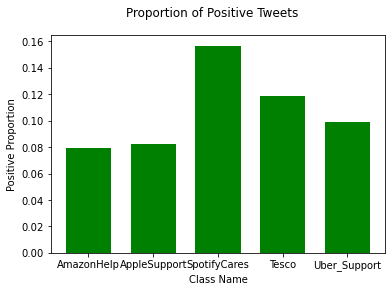

In [52]:
#Select items and plot proportion of reviews with respect to positive sentiments
PositivePercentage = [];
for i in range(len(SentimentCountByClass)):
    PositivePercentage.append(SentimentCountByClass.iloc[i]['Positive_sentiment']/SentimentCountByClass.iloc[i]['Total'])

plt.bar(SentimentCountByClass.index,PositivePercentage, color='green', width=0.7)
plt.xlabel('Class Name')
plt.ylabel('Positive Proportion')
plt.suptitle('Proportion of Positive Tweets');

<a id = "cell_TopicModeling"></a>
### 4. Topic Modelling

In [56]:
Topic = Tw_df.query("customer in ('AppleSupport')")
Topic

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017
402,702,115855,True,Tue Oct 31 22:11:31 +0000 2017,@AppleSupport Tried resetting my settings .. r...,701,703.0,AppleSupport,Tue,Oct,31,22:11:31,+0000,2017
404,704,115855,True,Tue Oct 31 21:59:17 +0000 2017,@AppleSupport This is what it looks like https...,703,705.0,AppleSupport,Tue,Oct,31,21:59:17,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99691,125799,144228,True,Fri Nov 24 02:45:23 +0000 2017,@AppleSupport I seriously can’t get customer s...,NaN,125796.0,AppleSupport,Fri,Nov,24,02:45:23,+0000,2017
99692,125800,144228,True,Fri Nov 24 02:39:57 +0000 2017,@AppleSupport It requires a serial number whic...,NaN,125796.0,AppleSupport,Fri,Nov,24,02:39:57,+0000,2017
99695,125803,144229,True,Fri Nov 24 02:24:18 +0000 2017,@AppleSupport My iPhone power button stops fun...,125802,NaN,AppleSupport,Fri,Nov,24,02:24:18,+0000,2017
99699,125807,143286,True,Fri Nov 24 02:34:10 +0000 2017,@AppleSupport And I can’t!,NaN,125806.0,AppleSupport,Fri,Nov,24,02:34:10,+0000,2017


In [57]:
regex ="\B@\w+"
Topic.text = Topic.text.str.replace(regex, '')

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3765219287.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Topic.text = Topic.text.str.replace(regex, '')
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
regex ="http\S+"
Topic.text = Topic.text.str.replace(regex, '')

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/714703126.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Topic.text = Topic.text.str.replace(regex, '')


In [59]:
Topic.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,The newest update. I️ made sure to download i...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,why are my I️’s changing not showing up corre...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017
402,702,115855,True,Tue Oct 31 22:11:31 +0000 2017,Tried resetting my settings .. restarting my ...,701,703.0,AppleSupport,Tue,Oct,31,22:11:31,+0000,2017
404,704,115855,True,Tue Oct 31 21:59:17 +0000 2017,This is what it looks like,703,705.0,AppleSupport,Tue,Oct,31,21:59:17,+0000,2017


In [60]:
# removing everything except alphabets`
Topic['clean_text'] = Topic['text'].str.replace("[^a-zA-Z#]", " ")

# removing short words
Topic['clean_text'] = Topic['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
Topic['clean_text'] = Topic['clean_text'].apply(lambda x: x.lower())

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3880879612.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Topic['clean_text'] = Topic['text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3880879612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['clean_text'] = Topic['text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_42521/3880879612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [65]:
from nltk.stem import PorterStemmer #Stemming Package  
import re  #Regular expression operation package

In [95]:
porter = PorterStemmer()

document = Topic
Cleaned_text = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review) 
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        review = ' '.join(Filtered_token)        
    except:
        continue
    #Save cleaned text
    Cleaned_text.append(review)  
    print('-[Review Text]: ', review)

-[Review Text]:  newest update made sure download yesterday
-[Review Text]:  
-[Review Text]:  changing showing correctly social media platforms
-[Review Text]:  tried resetting settings restarting phone that
-[Review Text]:  this what looks like
-[Review Text]:  have iphone plus
-[Review Text]:  need answers because annoying
-[Review Text]:  just sent
-[Review Text]:  anyone else upgraded having issues with capital mail puts
-[Review Text]:  this what happening
-[Review Text]:  call centres closed night
-[Review Text]:  going need share answers angela stand this
-[Review Text]:  hello internet someone explain this symbol keeps appearing phone when type letter also
-[Review Text]:  screenshot saying iphonex reserved then email saying what happened
-[Review Text]:  have iphone plus just most recent update
-[Review Text]:  thank updated phone even slower barely works thank ruining phone
-[Review Text]:  
-[Review Text]:  okey thank
-[Review Text]:  iphone plus
-[Review Text]:  need softw

-[Review Text]:  mais celular bateria fodida ajuda nois
-[Review Text]:  running very sluggish
-[Review Text]:  
-[Review Text]:  soft reset came back decent
-[Review Text]:  this update mess phone frozen notification screen running very unstable help please
-[Review Text]:  there problem after update
-[Review Text]:  much help just talks about deleting pictures once from desktop
-[Review Text]:  pictures magically deleted somehow what shit from fuck
-[Review Text]:  help everytime type showing question mark displays barcode please asap
-[Review Text]:  when type tweets messages with
-[Review Text]:  phone updated seeing boxes
-[Review Text]:  swear need this like right fucking even message manager group without looking dumb
-[Review Text]:  iphone version know this something that happens with friends iphones well haven tried anything
-[Review Text]:  everyone sees same thing seems default setting interested troubleshooting specific phone thanks
-[Review Text]:  last night keyboard dis

-[Review Text]:  this real store said there were updates
-[Review Text]:  
-[Review Text]:  this known that will fixed soon dock ipad continues stay centered only reboot will reset attached picture
-[Review Text]:  sent message
-[Review Text]:  responded please help
-[Review Text]:  there save photos have external hard drive icloud
-[Review Text]:  certainly collect some screenshots illustrate problem message later
-[Review Text]:  thanks checked that neither phone other listed alternative data source almost like because they both linked icloud account something here example from them listed same device name
-[Review Text]:  keep personal iphone pocket time also carry work iphone steps count from both devices seem added together health there stop this please didn happen
-[Review Text]:  storage nothing download storing icloud which still left help
-[Review Text]:  issue remains same have software date believe issue just with instagram stops screenshot slomo high quality from uploading


In [96]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Removing Stop Words
for r in range(len(Cleaned_text)):
    each_item = []
    for t in Cleaned_text[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_text[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_text[r])

-[Cleaned Text]:  newest update made sure download yesterday
-[Cleaned Text]:  
-[Cleaned Text]:  changing showing correctly social media platforms
-[Cleaned Text]:  tried resetting settings restarting phone
-[Cleaned Text]:  looks like
-[Cleaned Text]:  iphone plus
-[Cleaned Text]:  need answers annoying
-[Cleaned Text]:  sent
-[Cleaned Text]:  anyone else upgraded issues capital mail puts
-[Cleaned Text]:  happening
-[Cleaned Text]:  call centres closed night
-[Cleaned Text]:  going need share answers angela stand
-[Cleaned Text]:  hello internet someone explain symbol keeps appearing phone type letter also
-[Cleaned Text]:  screenshot saying iphonex reserved email saying happened
-[Cleaned Text]:  iphone plus recent update
-[Cleaned Text]:  thank updated phone even slower barely works thank ruining phone
-[Cleaned Text]:  
-[Cleaned Text]:  okey thank
-[Cleaned Text]:  iphone plus
-[Cleaned Text]:  need software update urgently battery lasts literally half
-[Cleaned Text]:  hola nec

-[Cleaned Text]:  yeah wipe without entering restrictions passcode tried
-[Cleaned Text]:  happens forget restrictions passcode turned clue wont reset
-[Cleaned Text]:  crazy thing phones periodically erase contacts crazy know
-[Cleaned Text]:  newest update
-[Cleaned Text]:  apple finna slide
-[Cleaned Text]:  
-[Cleaned Text]:  united kingdom
-[Cleaned Text]:  apple care iphone asking within time limit
-[Cleaned Text]:  result
-[Cleaned Text]:  response image sent email guys check thanks
-[Cleaned Text]:  cannot reset security questions logged account
-[Cleaned Text]:  wrong turns phones
-[Cleaned Text]:  also airpods suddenly stop playing music connected awhile
-[Cleaned Text]:  please explain thing would ever
-[Cleaned Text]:  current apple name like include surname name surname icloud email alias email
-[Cleaned Text]:  thanks much think suitable case trying know could icloud email alias apple
-[Cleaned Text]:  delete alias create apple could bring devices purchases
-[Cleaned Text

-[Cleaned Text]:  done still issues
-[Cleaned Text]:  suddenly working
-[Cleaned Text]:  connecting working open screen turns black closes
-[Cleaned Text]:  apple music still isnt working paying black screen
-[Cleaned Text]:  multitasking ipad getting right tits edit notepad switch another safari switch back reason scrolls elsewhere notepad lack memory incomplete state save poor
-[Cleaned Text]:  please help retrieve song downloaded
-[Cleaned Text]:  
-[Cleaned Text]:  volume ringer picture even come screen
-[Cleaned Text]:  earphones sound like half loud would full volume
-[Cleaned Text]:  music play song click share song click twitter account want talk click tweet song text
-[Cleaned Text]:  native music work youtube
-[Cleaned Text]:  guess tweet song music anymore feature even added work
-[Cleaned Text]:  running incredibly slow update
-[Cleaned Text]:  icloud sign
-[Cleaned Text]:  tell taking storage
-[Cleaned Text]:  
-[Cleaned Text]:  
-[Cleaned Text]:  please look iphones freez

### LATENT DIRICHLET ALLOCATION

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_text)
count_data

<2675x3452 sparse matrix of type '<class 'numpy.int64'>'
	with 17943 stored elements in Compressed Sparse Row format>

In [83]:
import numpy as np

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


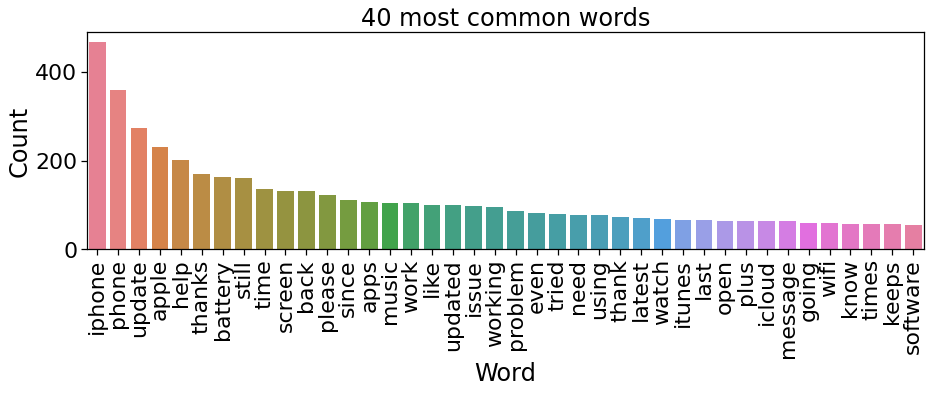

In [100]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_count = np.zeros(len(terms))
for t in count_data:
    total_count+=t.toarray()[0]

count_dic = (zip(terms, total_count))
count_dic = sorted(count_dic, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
word = [w[0] for w in count_dic]
count = [w[1] for w in count_dic]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})
sns.barplot(x_pos, count, palette='husl')
plt.xticks(x_pos, word, rotation=90) 
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [101]:
#Remove highly frequent (> 20%) and infrequent words (< 1%)
keepIndex = [];
for t in range(len(total_count)):
    if total_count[t] < 1000 and total_count[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  47


<2675x47 sparse matrix of type '<class 'numpy.int64'>'
	with 4785 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [103]:
# Tweak the two parameters below
numbertopics = 10
 
lda = LDA(n_components=numbertopics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_ 

array([[1.00008571e-01, 1.41891199e+02, 1.00002668e-01, 1.00002522e-01,
        1.00007212e-01, 1.24523938e-01, 1.00001183e-01, 1.00008757e-01,
        1.00001825e-01, 1.01964111e-01, 1.00002334e-01, 1.00008865e-01,
        1.00007207e-01, 1.00006233e-01, 1.00002364e-01, 1.00004950e-01,
        1.00004441e-01, 1.00008995e-01, 1.00000001e-01, 1.00004514e-01,
        1.00005294e-01, 1.00004512e-01, 1.00006503e-01, 1.00011519e-01,
        2.27137715e-01, 1.00005637e-01, 1.00004216e-01, 8.70999442e+01,
        1.25290574e+02, 1.00007710e-01, 1.00003223e-01, 1.21707012e-01,
        1.00004650e-01, 7.30999768e+01, 1.00001791e-01, 1.00005250e-01,
        1.00007830e-01, 1.00003104e-01, 1.00003021e-01, 4.04942549e-01,
        1.00003600e-01, 1.00004094e-01, 1.00005015e-01, 6.90999667e+01,
        1.00001077e-01, 1.00007569e-01, 1.00006143e-01],
       [1.00006119e-01, 2.90264573e+01, 1.00002728e-01, 1.00004454e-01,
        1.00003885e-01, 1.00006806e-01, 1.00003360e-01, 1.00017274e-01,
       

In [104]:
#Word Probablities in Topics
Prob = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Prob)

[[1.99553332e-04 2.83124349e-01 1.99541553e-04 1.99541261e-04
  1.99550619e-04 2.48470371e-04 1.99538589e-04 1.99553703e-04
  1.99539871e-04 2.03455341e-04 1.99540886e-04 1.99553918e-04
  1.99550610e-04 1.99548667e-04 1.99540947e-04 1.99546107e-04
  1.99545090e-04 1.99554178e-04 1.99536231e-04 1.99545236e-04
  1.99546793e-04 1.99545233e-04 1.99549206e-04 1.99559214e-04
  4.53222032e-04 1.99547478e-04 1.99544641e-04 1.73795945e-01
  2.50000088e-01 1.99551614e-04 1.99542660e-04 2.42849582e-04
  1.99545507e-04 1.45860937e-01 1.99539803e-04 1.99546706e-04
  1.99551853e-04 1.99542423e-04 1.99542257e-04 8.08007093e-04
  1.99543412e-04 1.99544398e-04 1.99546235e-04 1.37879468e-01
  1.99538378e-04 1.99551332e-04 1.99548487e-04]
 [3.08055579e-04 8.94121501e-02 3.08045134e-04 3.08050449e-04
  3.08048699e-04 3.08057696e-04 3.08047082e-04 3.08089942e-04
  3.08056384e-04 3.08279276e-04 3.08055577e-04 3.08054501e-04
  3.08049390e-04 3.08061120e-04 3.08049336e-04 3.08057486e-04
  3.08046394e-04 5.269

In [105]:
 for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dic = (zip(ReducedTerm, topic))
    count_dic = sorted(count_dic, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dic:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
phone : 0.440
help : 0.272
latest : 0.059
please : 0.059
update : 0.043

Topic #1:
apple : 0.434
wifi : 0.138
want : 0.128
store : 0.124
turn : 0.117

Topic #2:
screen : 0.291
apps : 0.234
letter : 0.113
updated : 0.100
open : 0.084

Topic #3:
working : 0.286
watch : 0.208
icloud : 0.190
using : 0.157
itunes : 0.147

Topic #4:
iphone : 0.630
issue : 0.116
plus : 0.087
battery : 0.054
using : 0.034

Topic #5:
thanks : 0.286
work : 0.168
problem : 0.147
last : 0.112
message : 0.107

Topic #6:
back : 0.329
music : 0.264
tried : 0.201
apple : 0.102
itunes : 0.046

Topic #7:
update : 0.281
still : 0.248
battery : 0.190
going : 0.093
since : 0.069

Topic #8:
time : 0.363
times : 0.155
keeps : 0.152
every : 0.144
phone : 0.087

Topic #9:
even : 0.195
please : 0.190
thank : 0.175
know : 0.139
need : 0.122


In [106]:
# View full Word Probabilities by Topic Matrix
Tw_df_topic_keywords = pd.DataFrame(Prob)
Tw_df_topic_keywords.columns = ReducedTerm
Tw_df_topic_keywords 

,also,apple,apps,back,battery,even,every,getting,going,help,...,tried,turn,update,updated,using,want,watch,wifi,work,working
0,0.000200,0.283124,0.000200,0.000200,0.000200,0.000248,0.000200,0.000200,0.000200,0.000203,...,0.000200,0.000200,0.000808,0.000200,0.000200,0.000200,0.137879,0.000200,0.000200,0.000200
1,0.000308,0.089412,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,...,0.000308,0.000308,0.000314,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308
2,0.000115,0.000115,0.000115,0.000115,0.076726,0.000115,0.000115,0.000115,0.000115,0.000115,...,0.000115,0.000115,0.231488,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115
3,0.000213,0.126195,0.000213,0.000213,0.000213,0.025576,0.000213,0.000213,0.000213,0.000213,...,0.000213,0.074898,0.000213,0.000213,0.163847,0.119219,0.000213,0.000213,0.000213,0.000213
4,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.061870,0.000148,0.000148,...,0.000148,0.000148,0.018203,0.000148,0.000148,0.000148,0.000148,0.000148,0.155083,0.000148
5,0.000319,0.000319,0.000319,0.417676,0.000319,0.000319,0.000319,0.039093,0.000319,0.000319,...,0.255193,0.050835,0.000319,0.000319,0.000319,0.000319,0.000319,0.191474,0.000319,0.000319
6,0.000273,0.000273,0.289212,0.000273,0.000273,0.000273,0.147468,0.000273,0.000273,0.000273,...,0.000273,0.000273,0.089737,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273
7,0.088969,0.000174,0.000174,0.000174,0.167913,0.044412,0.000174,0.000174,0.000174,0.000174,...,0.000174,0.000174,0.000241,0.172541,0.000174,0.000174,0.000174,0.000174,0.000174,0.000174
8,0.000161,0.000161,0.000161,0.000161,0.000161,0.071916,0.000161,0.000161,0.000161,0.324915,...,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161
9,0.000241,0.000241,0.000241,0.000241,0.000241,0.000241,0.000241,0.000241,0.144903,0.000241,...,0.000241,0.000241,0.063614,0.000241,0.000241,0.000241,0.000241,0.000241,0.000241,0.229289


In [107]:
from wordcloud import WordCloud
import math

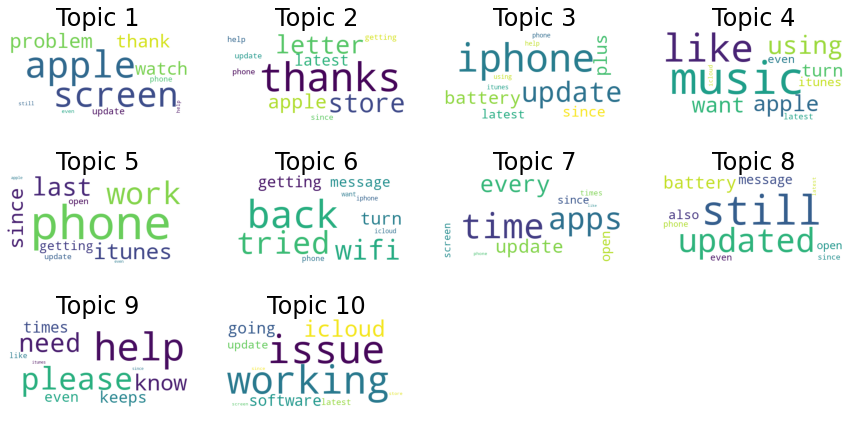

In [108]:
rows = math.ceil(len(Prob)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Prob):
    count_dic = (zip(ReducedTerm, topic))
    count_dic = sorted(count_dic, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dic[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))       
plt.show()

Thus, the Topics frequently mentioned provided in the word cloud above with words mainly revolving around : 

Topic 1 : Phone 
Topic 2 : apple 
Topic 3 : screen
Topic 4 : working
Topic 5 : iphone 
Topic 6 : thanks 
Topic 7 : Music
Topic 8 : Update 
Topic 9 : Time 
Topic 10 : even

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

**Aim:** To apply analytics result in addressing practical business problems.



The above techniques such as Lexicon based sentiment analysis and NLTK methods can be used to analyse huge volumes of Twitter data. Additionally the algorithms can be applied to any kind of textual data such as news articles or customer service chat data. Due to large sums of corpus, it is becoming more and more imperative to gain insight on how customers view the businesses around them via Sentiment Analysis and calculating the positive and negative sentiment score is beneficial as it helps in : 

- Strategically implementing new practices in the business adhering to the sentiments of the customers
- Launching new products and services(for instance : new software updates of the phones purchased) based on customer's preferences.
- Competing with other companies by improving their service quality. 
- Targeting more audience for business expansion. 

### References: 

#References : https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb

http://localhost:8891/notebooks/Desktop/Advanced%20AI/MIS780W03-Lab.ipynb#cell_Matrix

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://medium.com/@kdavis7190/twitter-customer-support-sentiment-analysis-and-topic-modeling-2800376ec25c

https://towardsdatascience.com/2-latent-methods-for-dimension-reduction-and-topic-modeling-20ff6d7d547

https://github.com/RigautAntoine/twitter-customer-service